# **PREDICTION USING SUPERVISED MACHINE LEARNING**

This notebbok reads the data from `data/file.csv` and analyses this data to perform predictions.

We will be answering 2 questions.

1. Predict a student's accuracy(out of 100%) based on the number of hours they practice DSA.
2. What will be the predicted accuracy if a student practices for 9.8 hours/day?


#### **Step 1: Import all the required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### **Step 2: Read Dataset from CSV file**

In [3]:
#read data from csv file and check whether it has been successfully imported or not
sample_data=pd.read_csv('./../data/file.csv')

In [4]:
sample_data.head()

,Hours,Accuracy
0,8.2,81
1,2.5,25
2,7.7,87
3,5.8,63
4,4.4,41


In [5]:
sample_data.tail()

,Hours,Accuracy
20,6.0,60
21,7.3,69
22,2.7,29
23,4.9,51
24,3.7,35


#### **Step 3: Represent the relationship between the data by plotting a graph**

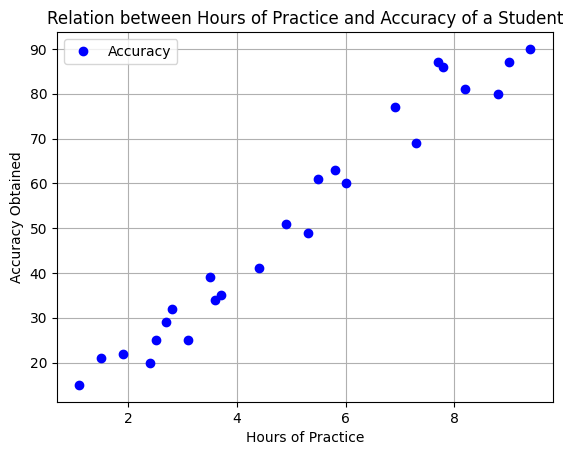

In [6]:
#plot the graph and add labels
sample_data.plot(x="Hours",y="Accuracy",style="b o")
plt.title("Relation between Hours of Practice and Accuracy of a Student")
plt.xlabel("Hours of Practice")
plt.ylabel("Accuracy Obtained")
plt.grid()
plt.show()

#### **Step 4: Use *corr()* method to determine actual correlation between the variables**

In [7]:
sample_data.corr()

,Hours,Accuracy
Hours,1.000000,0.981853
Accuracy,0.981853,1.000000


#### **Step 5: Retrieve Attribute(Input) Values and Label(Output) Values**

In [8]:
#csvdataset.iloc[row, column]
x=sample_data.iloc[:,:-1].values
y=sample_data.iloc[:,1:].values
print("X[Hours]")
print(x)
print("Y[Accuracy]")
print(y)
#print the data

X[Hours]
[[8.2]
 [2.5]
 [7.7]
 [5.8]
 [4.4]
 [2.4]
 [5.3]
 [6.9]
 [7.8]
 [1.5]
 [9.4]
 [5.5]
 [3.5]
 [1.1]
 [9. ]
 [2.8]
 [1.9]
 [3.1]
 [8.8]
 [3.6]
 [6. ]
 [7.3]
 [2.7]
 [4.9]
 [3.7]]
Y[Accuracy]
[[81]
 [25]
 [87]
 [63]
 [41]
 [20]
 [49]
 [77]
 [86]
 [21]
 [90]
 [61]
 [39]
 [15]
 [87]
 [32]
 [22]
 [25]
 [80]
 [34]
 [60]
 [69]
 [29]
 [51]
 [35]]


#### **Step 6: Split *sample_data* into Training Sets & Test Sets using Scikit-Learn's *train_test_split()* method**

In [9]:
#The default test_size is 0.25. This means 25% of the data is testing data and 75% is training data
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=50)

#### **Step 7: Train the Model**

In [10]:
#LinearRegression()
lrf=LinearRegression().fit(X_train,y_train)
print("The model has been trained")


The model has been trained


#### **Step 8: Compare the plotted regression line with the actual values**

In [ ]:
#Graph of Trained Model
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,lrf.predict(X_train),color='green')
plt.title("Relation between the Hours and Accuracy of a Student")
plt.xlabel("Hours of Practice")
plt.ylabel("Accuracy Obtained")
plt.grid()
plt.show()

#### **Step 9: Use predict() method to predict accuracy of student(test_set) and compare the predicted values with the actual values**

**Table**

In [11]:
#use dataframes
y_predict=lrf.predict(X_test)
df=pd.DataFrame({'Hours of practice':X_test[:,0],'Actual Accuracy':y_test[:,0],'Predicted Accuracy':y_predict[:,0]})
print(df)


   Hours of practice  Actual Accuracy  Predicted Accuracy
0                2.8               32           28.748576
1                6.0               60           59.965166
2                4.9               51           49.234463
3                2.7               29           27.773057
4                9.0               87           89.230719
5                3.5               39           35.577205
6                7.8               86           77.524498


**Visualisation**

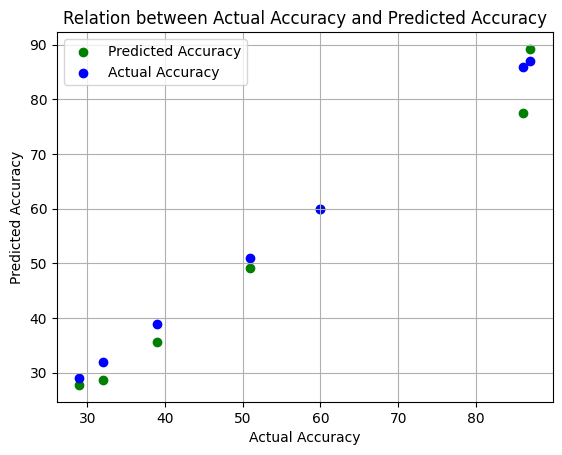

In [12]:
#plot graph b/w predicted accuracy and actual accuracy

plt.scatter(y_test,y_predict,color='green')
plt.scatter(y_test,y_test,color='blue')
plt.legend(["Predicted Accuracy", "Actual Accuracy"])
plt.title("Relation between Actual Accuracy and Predicted Accuracy")
plt.xlabel("Actual Accuracy")
plt.ylabel("Predicted Accuracy")
plt.grid()
plt.show()

#### **Step 10: Predicting accuracy of the student using trained model**

In [13]:
#equation of a line = y=mx+c where, m is the gradient and c is the intercept
def pred_acc(x):
  y=(lrf.coef_*x)+lrf.intercept_
  print("The predicted accuracy that can be acheived if the student practices",x,"hours a day is",round(float(y),6),"%")


In [17]:
#call function
x=float(input("Enter the number of Hours:"))
pred_acc(x)

The predicted accuracy that can be acheived if the student practices 9.8 hours a day is 97.034867 %


#### **Step 11: Model Evaluation**

**Error Calculation**

In [15]:
#Find the error between the actual values and the predicted values
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict))
print("Mean Squared Error:",mean_squared_error(y_test,y_predict))

Mean Absolute Error: 2.9153935470344865
Mean Squared Error: 14.81732207143862


**Efficiency of the model**

In [16]:
#print efficiency
accuracy=lrf.score(X_train,y_train)
print(accuracy*100,"%")

96.09240422275076 %
